**Importing the Libraries**

In [25]:

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
stroke_df =pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [3]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Attribute Information

*id: unique identifier

*gender: "Male", "Female" or "Other"

*age: age of the patient

*hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

*heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

*ever_married: "No" or "Yes"

*work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

*Residence_type: "Rural" or "Urban"

*avg_glucose_level: average glucose level in blood

*bmi: body mass index => weight in kilograms / the square of height in meters

*smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

*stroke: 1 if the patient had a stroke or 0 if not

bmi column has issues.
bmi column had null values, so was imputing them with the mean of the column.


In [5]:
#Create an instance of the Imputer class
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the column with missing values
imputer.fit(stroke_df[['bmi']])

# Use the transform method to fill in missing values with the mean of the column
stroke_df['bmi'] = imputer.transform(stroke_df[['bmi']])

In [6]:
#looking into dataset if bmi is imputed or not
stroke_df.info()   # looks good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


**Exploring Age Feature**

<Axes: xlabel='age', ylabel='Count'>

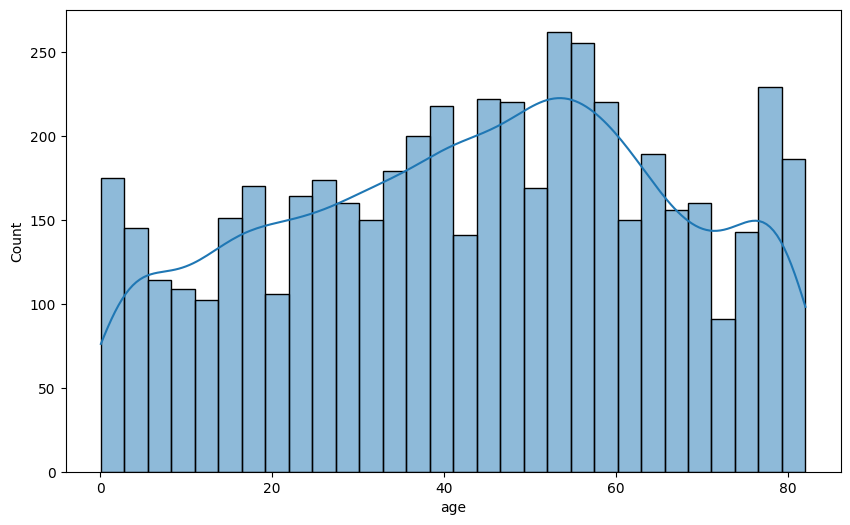

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(stroke_df.age,kde=True,bins=30)

<Axes: xlabel='count', ylabel='work_type'>

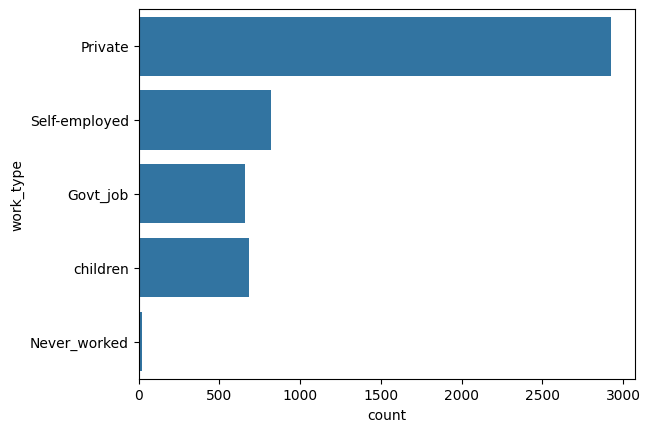

In [21]:
sns.countplot(stroke_df['work_type'])

In [23]:
stroke_df.work_type.value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

**Very Sad to say in the era of AI total 687 childrens are affected with heart stroke out of 5110.**

Let's see the age group of children

In [13]:
stroke_df.age[stroke_df.age < 1].value_counts()

age
0.88    5
0.32    5
0.24    5
0.72    5
0.56    5
0.64    4
0.80    4
0.48    3
0.16    3
0.40    2
0.08    2
Name: count, dtype: int64

In [14]:
stroke_df[stroke_df.age < 1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.900000,Unknown,0
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.500000,Unknown,0
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.200000,Unknown,0
982,54747,Male,0.88,0,0,No,children,Rural,157.57,19.200000,Unknown,0
996,53279,Male,0.24,0,0,No,children,Rural,118.87,16.300000,Unknown,0
1093,66772,Female,0.32,0,0,No,children,Rural,55.86,16.000000,Unknown,0
1206,68908,Female,0.72,0,0,No,children,Urban,66.36,23.000000,Unknown,0
1317,30084,Male,0.80,0,0,No,children,Rural,98.67,17.500000,Unknown,0
1600,40544,Male,0.40,0,0,No,children,Urban,109.56,14.300000,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.100000,Unknown,0


In [15]:
stroke_df.work_type[stroke_df.age < 1] == 'children'

363     True
376     True
564     True
982     True
996     True
1093    True
1206    True
1317    True
1600    True
1614    True
1808    True
1975    True
1999    True
2008    True
2012    True
2030    True
2358    True
2481    True
2490    True
2579    True
2630    True
2801    True
2875    True
2898    True
3251    True
3295    True
3392    True
3440    True
3618    True
3626    True
3859    True
3894    True
3968    True
4007    True
4021    True
4053    True
4293    True
4409    True
4581    True
4645    True
4910    True
4929    True
5089    True
Name: work_type, dtype: bool

It appears that it's not a mistake these are children(infants)

**Let's explore more for children age category less than 10**

In [16]:
stroke_df[stroke_df.age < 10]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,28.893237,Unknown,1
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.000000,Unknown,0
251,16523,Female,8.00,0,0,No,Private,Urban,110.89,17.600000,Unknown,0
282,33759,Female,3.00,0,0,No,children,Urban,73.74,16.000000,Unknown,0
291,11014,Male,4.00,0,0,No,children,Rural,79.17,20.000000,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5078,27446,Female,8.00,0,0,No,children,Urban,76.31,15.500000,Unknown,0
5079,42709,Male,1.72,0,0,No,children,Urban,77.28,17.100000,Unknown,0
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.800000,Unknown,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.400000,Unknown,0


In [17]:
stroke_df.work_type[stroke_df.age < 10] == 'children'

162      True
249      True
251     False
282      True
291      True
        ...  
5078     True
5079     True
5089     True
5095     True
5098     True
Name: work_type, Length: 472, dtype: bool

In [18]:
stroke_df.age[stroke_df.age < 10].value_counts()

age
5.00    65
8.00    58
2.00    55
3.00    46
9.00    38
4.00    34
7.00    32
6.00    24
1.80     9
1.08     8
1.88     8
1.32     8
1.24     8
1.64     8
1.48     6
1.72     6
0.56     5
0.72     5
1.00     5
0.24     5
0.32     5
0.88     5
1.56     4
1.16     4
0.80     4
0.64     4
1.40     3
0.48     3
0.16     3
0.40     2
0.08     2
Name: count, dtype: int64

**Let's explore for youth age category less than 20**

In [19]:
stroke_df[stroke_df.age < 20]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,28.893237,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.900000,Unknown,1
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.000000,Unknown,0
251,16523,Female,8.00,0,0,No,Private,Urban,110.89,17.600000,Unknown,0
253,46136,Male,14.00,0,0,No,Never_worked,Rural,161.28,19.100000,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5094,28048,Male,13.00,0,0,No,children,Urban,82.38,24.300000,Unknown,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.400000,Unknown,0
5098,579,Male,9.00,0,0,No,children,Urban,71.88,17.500000,Unknown,0
5103,22127,Female,18.00,0,0,No,Private,Urban,82.85,46.900000,Unknown,0


In [20]:
stroke_df.age[stroke_df.age < 20].value_counts()

age
5.00     65
17.00    60
18.00    60
8.00     58
13.00    57
2.00     55
14.00    54
16.00    52
19.00    50
3.00     46
15.00    45
12.00    45
9.00     38
11.00    36
10.00    35
4.00     34
7.00     32
6.00     24
1.80      9
1.24      8
1.88      8
1.32      8
1.08      8
1.64      8
1.48      6
1.72      6
0.56      5
0.72      5
0.32      5
0.24      5
1.00      5
0.88      5
1.56      4
1.16      4
0.80      4
0.64      4
1.40      3
0.48      3
0.16      3
0.40      2
0.08      2
Name: count, dtype: int64

**Total 276 children**

MAPPING OF CATEGORICAL VARIABLES

In [24]:
stroke_df['work_type'] = stroke_df['work_type'].map({'Privat':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4})

In [26]:
stroke_df['gender'] = stroke_df['gender'].map({'Male':0, 'Female':1})

In [27]:
stroke_df['Residence_type'] = stroke_df['Residence_type'].map({'Urban':0, 'Rural':1})
stroke_df['smoking_status'] = stroke_df['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
stroke_df['ever_married'] = stroke_df['ever_married'].map({'Yes':0, 'No':1})

In [28]:
#looking after mapping
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,0,NaN,0,228.69,36.600000,0,1
1,51676,1.0,61.0,0,0,0,1.0,1,202.21,28.893237,1,1
2,31112,0.0,80.0,0,1,0,NaN,1,105.92,32.500000,1,1
3,60182,1.0,49.0,0,0,0,NaN,0,171.23,34.400000,2,1
4,1665,1.0,79.0,1,0,0,1.0,1,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,0,NaN,0,83.75,28.893237,1,0
5106,44873,1.0,81.0,0,0,0,1.0,0,125.20,40.000000,1,0
5107,19723,1.0,35.0,0,0,0,1.0,1,82.99,30.600000,1,0
5108,37544,0.0,51.0,0,0,0,NaN,1,166.29,25.600000,0,0


Heat map

<Axes: >

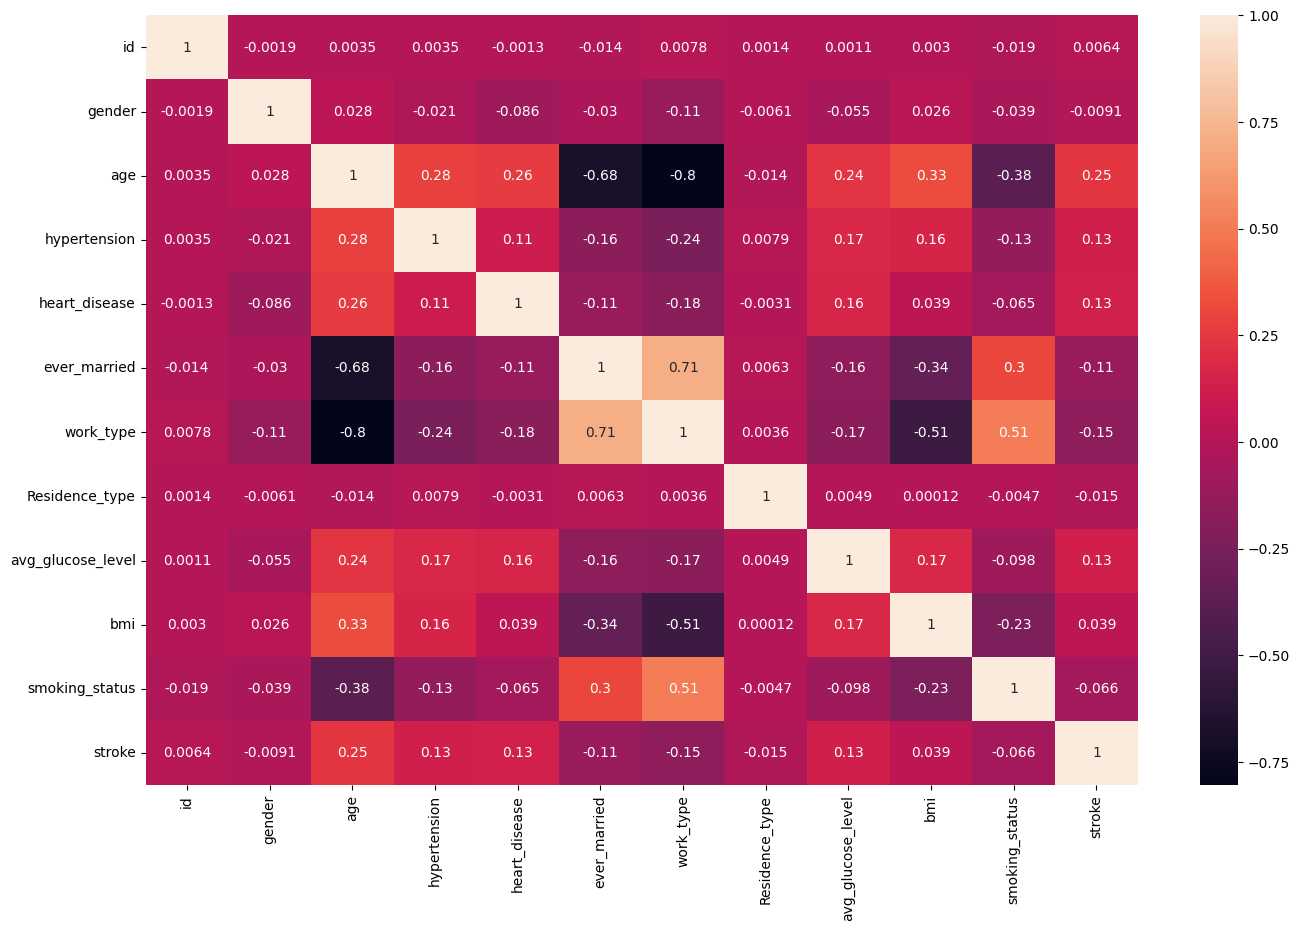

In [29]:
plt.figure(figsize=(16,10))
sns.heatmap(stroke_df.corr(method='pearson'),annot=True)

**DATA VISUALIZATION**

**Pia chart for Hypertention**

([<matplotlib.patches.Wedge at 0x7a3843d13940>,
 [Text(-1.3348942113978373, 0.42196853481811436, 'No Hypertension'),
  Text(1.1441950298751005, -0.3616873423402018, 'Hypertension')],
 [Text(-0.8581462787557526, 0.2712654866687878, '90.3%'),
  Text(0.6674471007604752, -0.21098428303178438, '9.7%')])

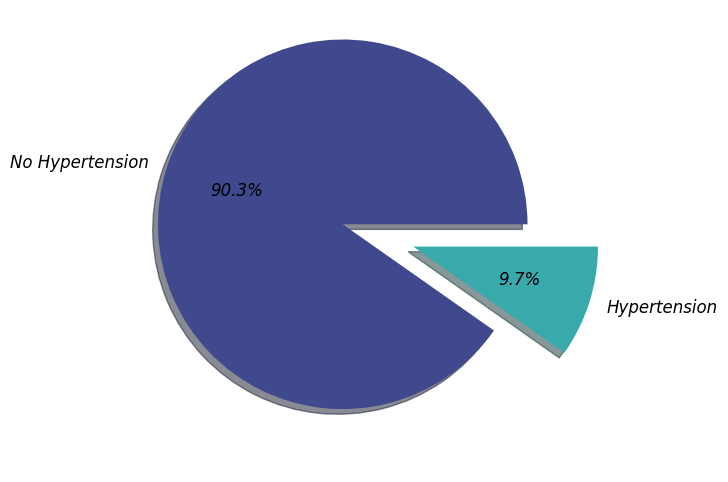

In [30]:
plt.figure(figsize=(10,6))
plt.pie(stroke_df.hypertension.value_counts(),labels=['No Hypertension','Hypertension'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

**Pia chart for Gender**

([<matplotlib.patches.Wedge at 0x7a38443a5cc0>,
 [Text(-0.373767233395347, 1.3491842184223728, 'male'),
  Text(0.32037180606480214, -1.1564436457859832, 'female')],
 [Text(-0.24027893575415166, 0.8673327118429538, '58.6%'),
  Text(0.18688355353780126, -0.6745921267084902, '41.4%')])

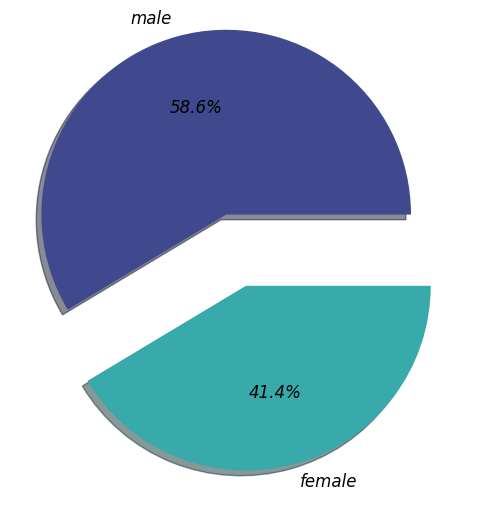

In [31]:
plt.figure(figsize=(10,6))
plt.pie(stroke_df.gender.value_counts(),labels=['male','female'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

**Pia Chart for Gender**

([<matplotlib.patches.Wedge at 0x7a384421a620>,
 [Text(-0.03528546122693177, 1.3995552637270179, 'Urbal'),
  Text(0.03024479336807372, -1.1996187946485846, 'Rural')],
 [Text(-0.02268351078874185, 0.8997140981102257, '50.8%'),
  Text(0.017642796131376336, -0.6997776302116743, '49.2%')])

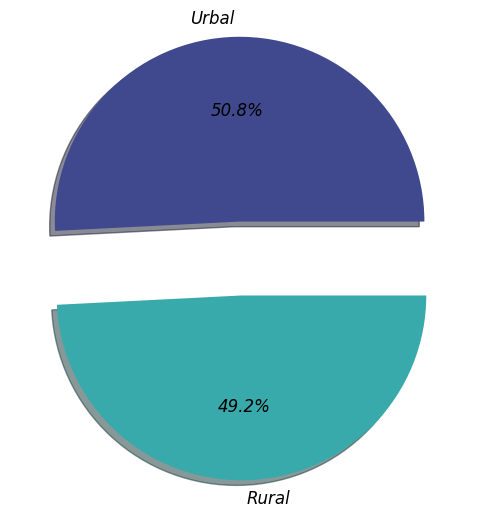

In [34]:
plt.figure(figsize=(10,6))
plt.pie(stroke_df.Residence_type.value_counts(),labels=['Urbal','Rural'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

<Axes: xlabel='age', ylabel='avg_glucose_level'>

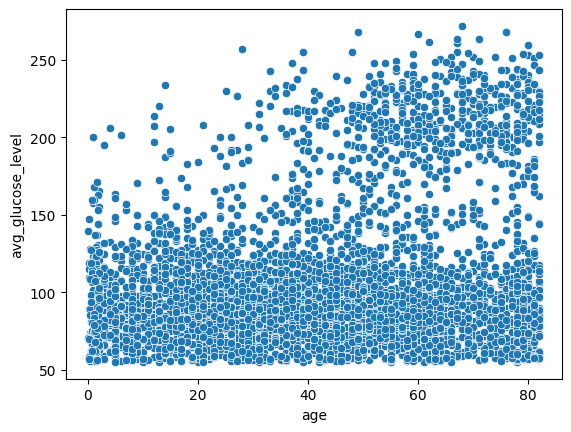

In [35]:
sns.scatterplot(x=stroke_df['age'], y=stroke_df['avg_glucose_level'])

Conclusion: Increasing age increases glucose level also

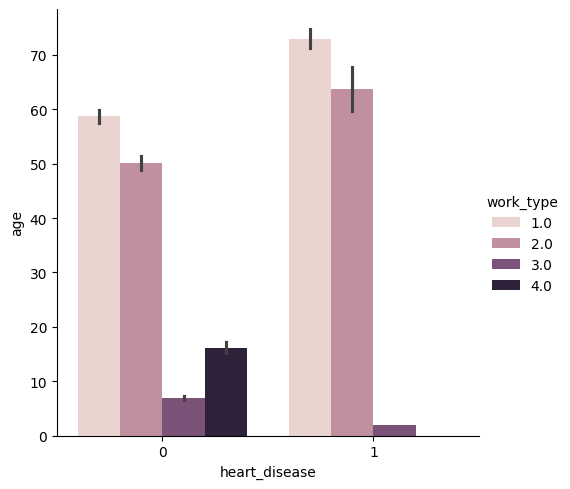

In [36]:
sns.catplot(x='heart_disease',y='age', hue="work_type", kind="bar", data=stroke_df)

Conclusion: From above bar chart i can only see childrens are affecting with heart stroke.The people who are self employed are in high risk of having Herat disease or stroke

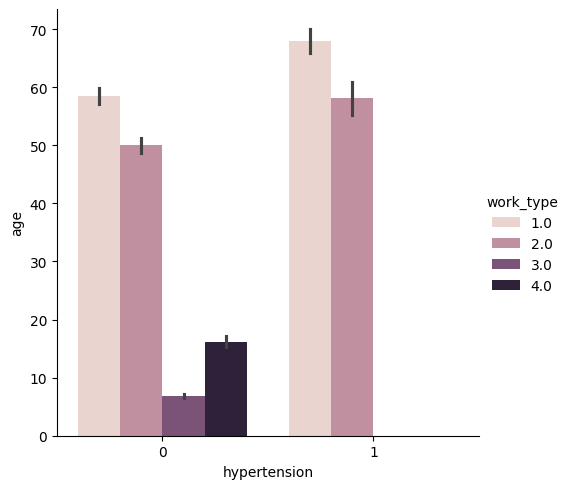

In [37]:
sns.catplot(x='hypertension',y='age', hue="work_type", kind="bar", data=stroke_df)

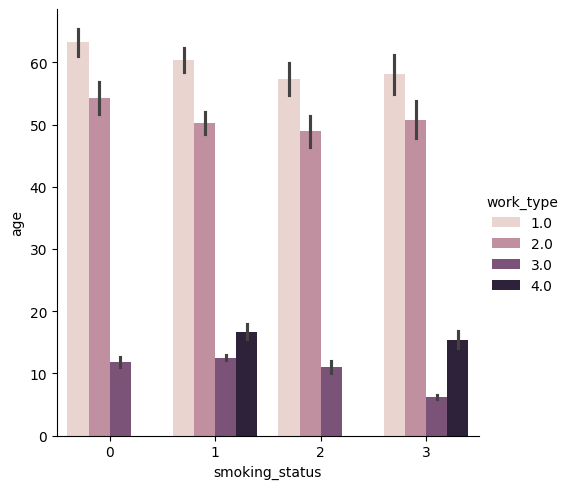

In [39]:
sns.catplot(x='smoking_status',y='age', hue="work_type", kind="bar", data=stroke_df)

Conclusion: Self employed people are at high risk

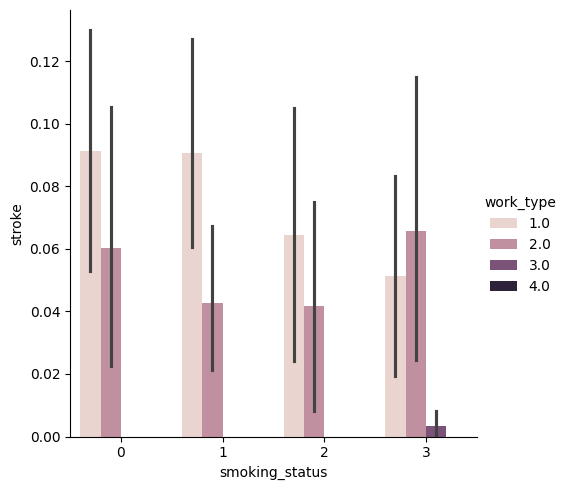

In [40]:
sns.catplot(x="smoking_status", y="stroke", hue="work_type", kind="bar", data=stroke_df)

Conclusion: Again Self employed people are at high risk

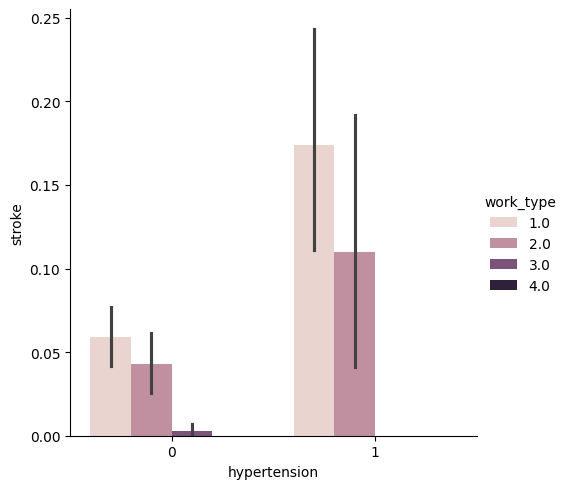

In [42]:
sns.catplot(x="hypertension", y="stroke", hue="work_type", kind="bar", data=stroke_df)

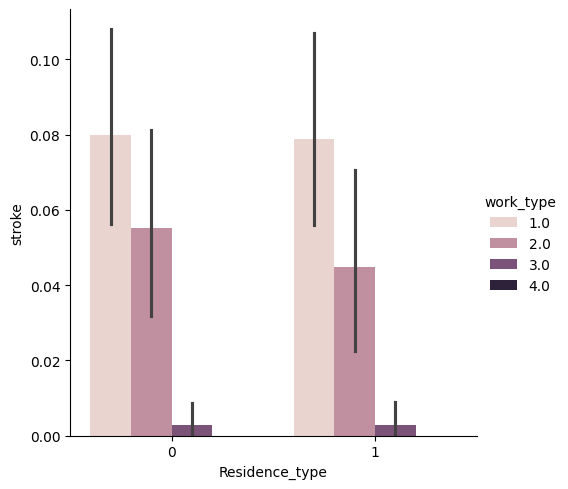

In [43]:
sns.catplot(x="Residence_type", y="stroke", hue="work_type", kind="bar", data=stroke_df)

Conclusion: Residence type hardly makes difference

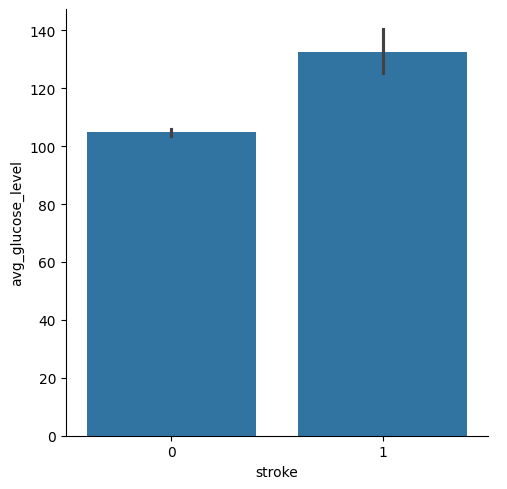

In [45]:
sns.catplot(x='stroke', y="avg_glucose_level", kind="bar", data=stroke_df)

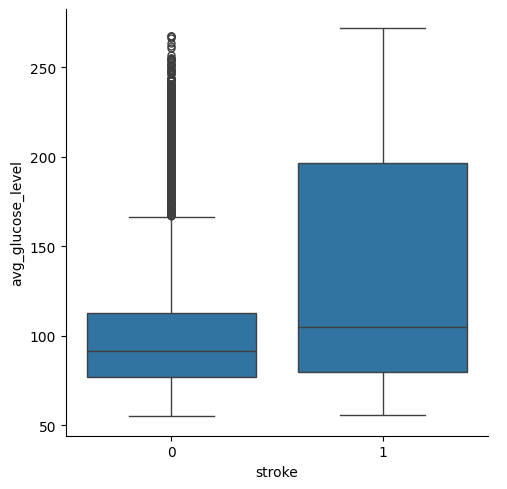

In [48]:
#same plot with boxplot
sns.catplot(x='stroke', y="avg_glucose_level", kind="box", data=stroke_df)

Conclusion:
People having higher glucose level are at high risk

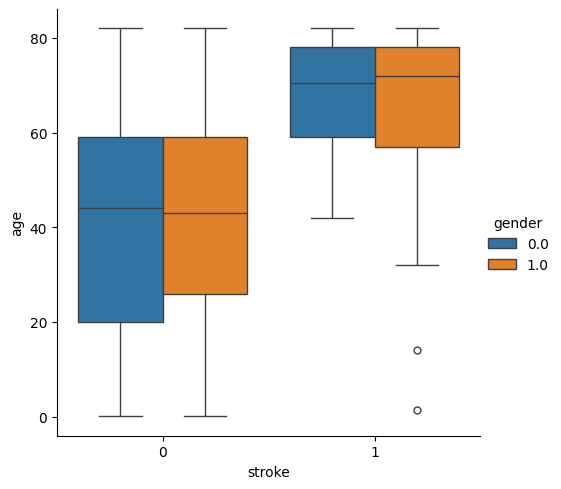

In [46]:
sns.catplot(x='stroke', y="age", hue = 'gender', kind="box", data=stroke_df)

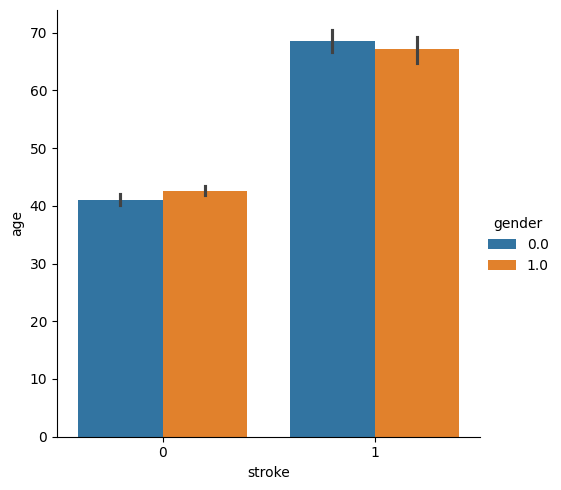

In [47]:
#same plot with barplot
sns.catplot(x='stroke', y="age", hue = 'gender', kind="bar", data=stroke_df)

Conclusion: Feamles with high age at risk

**APPLYING MACHINE LEARNING ALGORITHMS**

Dividing data set into Features and labels

Splitting the data set


In [56]:
features = ['id','age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender',
 #'work_type',
 'smoking_status']

label = ['stroke']

X = stroke_df[features]
y = stroke_df[label]


As we deal with work_type column i will not consider this column in features

In [57]:

X.shape,y.shape

((5110, 10), (5110, 1))

In [58]:
#checking once again null value
X.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               1
smoking_status       0
dtype: int64

Let's first deal wirh gender column

In [ ]:
X.gender=(X.gender.fillna(1))

In [60]:
X.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               0
smoking_status       0
dtype: int64

Gender column is ok now

**Treating Imbalanced Dataset**

In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=123)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [63]:
#decided to drop id column as it is not required
X_train = X_train.drop(columns=['id'])
X_test = X_test.drop(columns=['id'])

In [64]:
y.value_counts()

stroke
0         4861
1          249
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7a3841325e40>,
 [Text(-1.3836278213372577, 0.21348080012383747, 'No Stroke'),
  Text(1.185966701861844, -0.18298355684306683, 'Stroke')],
 [Text(-0.8894750280025228, 0.13723765722246695, '95.1%'),
  Text(0.691813909419409, -0.10674040815845563, '4.9%')])

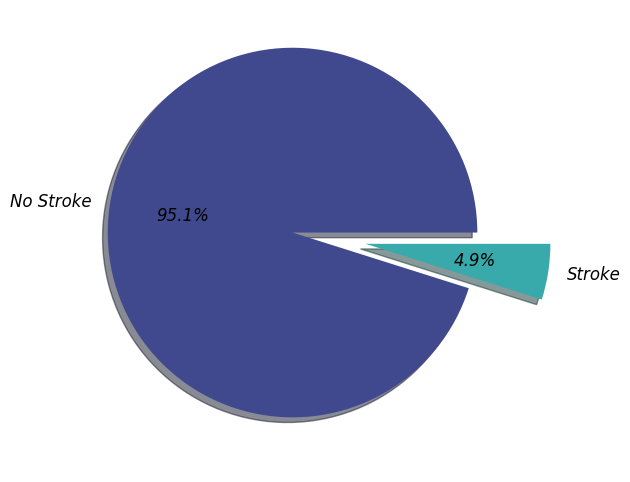

In [65]:
plt.figure(figsize=(10,6))
plt.pie(stroke_df.stroke.value_counts(),labels=['No Stroke','Stroke'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

Huge Imbalancing

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Apllying 1 Algorithm XGBOOST CLASSIFIER

In [67]:
import xgboost as xgb

In [68]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
y_pred_xgb = model_xgb.predict(X_test)

In [71]:
from sklearn.metrics import  roc_auc_score,accuracy_score,

In [72]:
roc_auc_score(y_test, y_pred_xgb)

0.9434955287582143

**GREAT SCORE !!!!!!!!!!!!!!!!!!!!!!!!!!**